In [1]:
using thesis, PRMaps
using Healpix
using Plots
using Statistics
using Distributions
using LinearAlgebra

import Stripeline as Sl

In [2]:
ideal = readPolarizedMapFromFITS("maps_10days/maps/ideal.fits", 1, Float64)
errored = readPolarizedMapFromFITS("maps_10days/maps/altitude_offset.fits", 1, Float64)

PolarizedHealpixMap{Float64, RingOrder, Vector{Float64}}([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN])

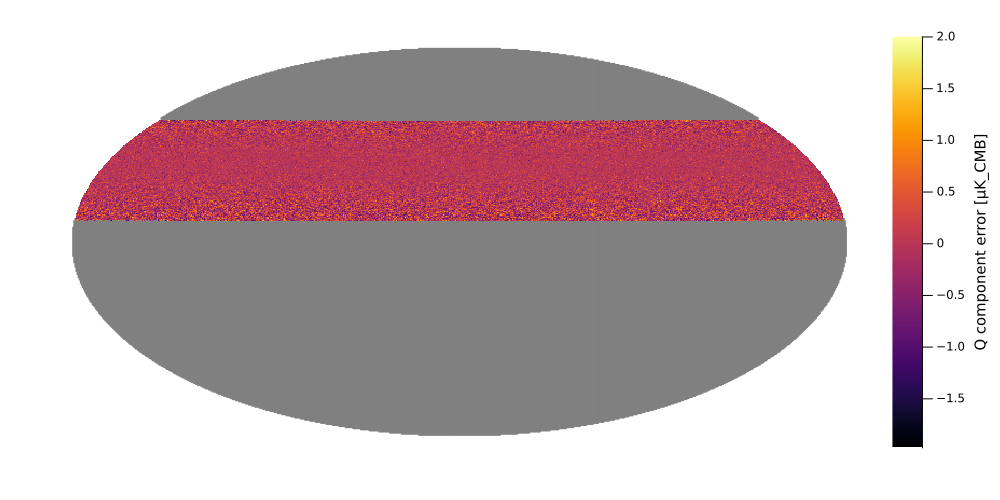

In [3]:
result = ideal.q - errored.q 
plot(result, size = (1000, 500), colorbar_title="Q component error [μK_CMB]")

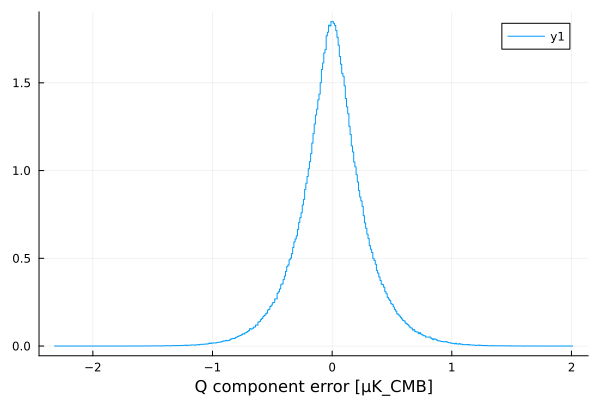

In [4]:
stephist(result[isfinite.(result)], normalize = true, xaxis="Q component error [μK_CMB]")

# Polarization degree

In [5]:
ideal_pol = HealpixMap{Float64, RingOrder}(512)
errored_pol = HealpixMap{Float64, RingOrder}(512)

polDegreeMap!(ideal_pol, ideal.i, ideal.q, ideal.u)
polDegreeMap!(errored_pol, errored.i, errored.q, errored.u)

limite = 0.2

result_pol = ideal_pol-errored_pol
result_out = result_pol.pixels[abs.(result_pol.pixels).>limite]
result_pol.pixels[abs.(result_pol.pixels).>limite] .= NaN
#result_pol.pixels .= log.(abs.(result_pol.pixels)) 

nothing

In [6]:
# Percentuale di pixel scartati
length(result_out)/length(result_pol[isfinite.(result_pol)])

0.06229412980224174

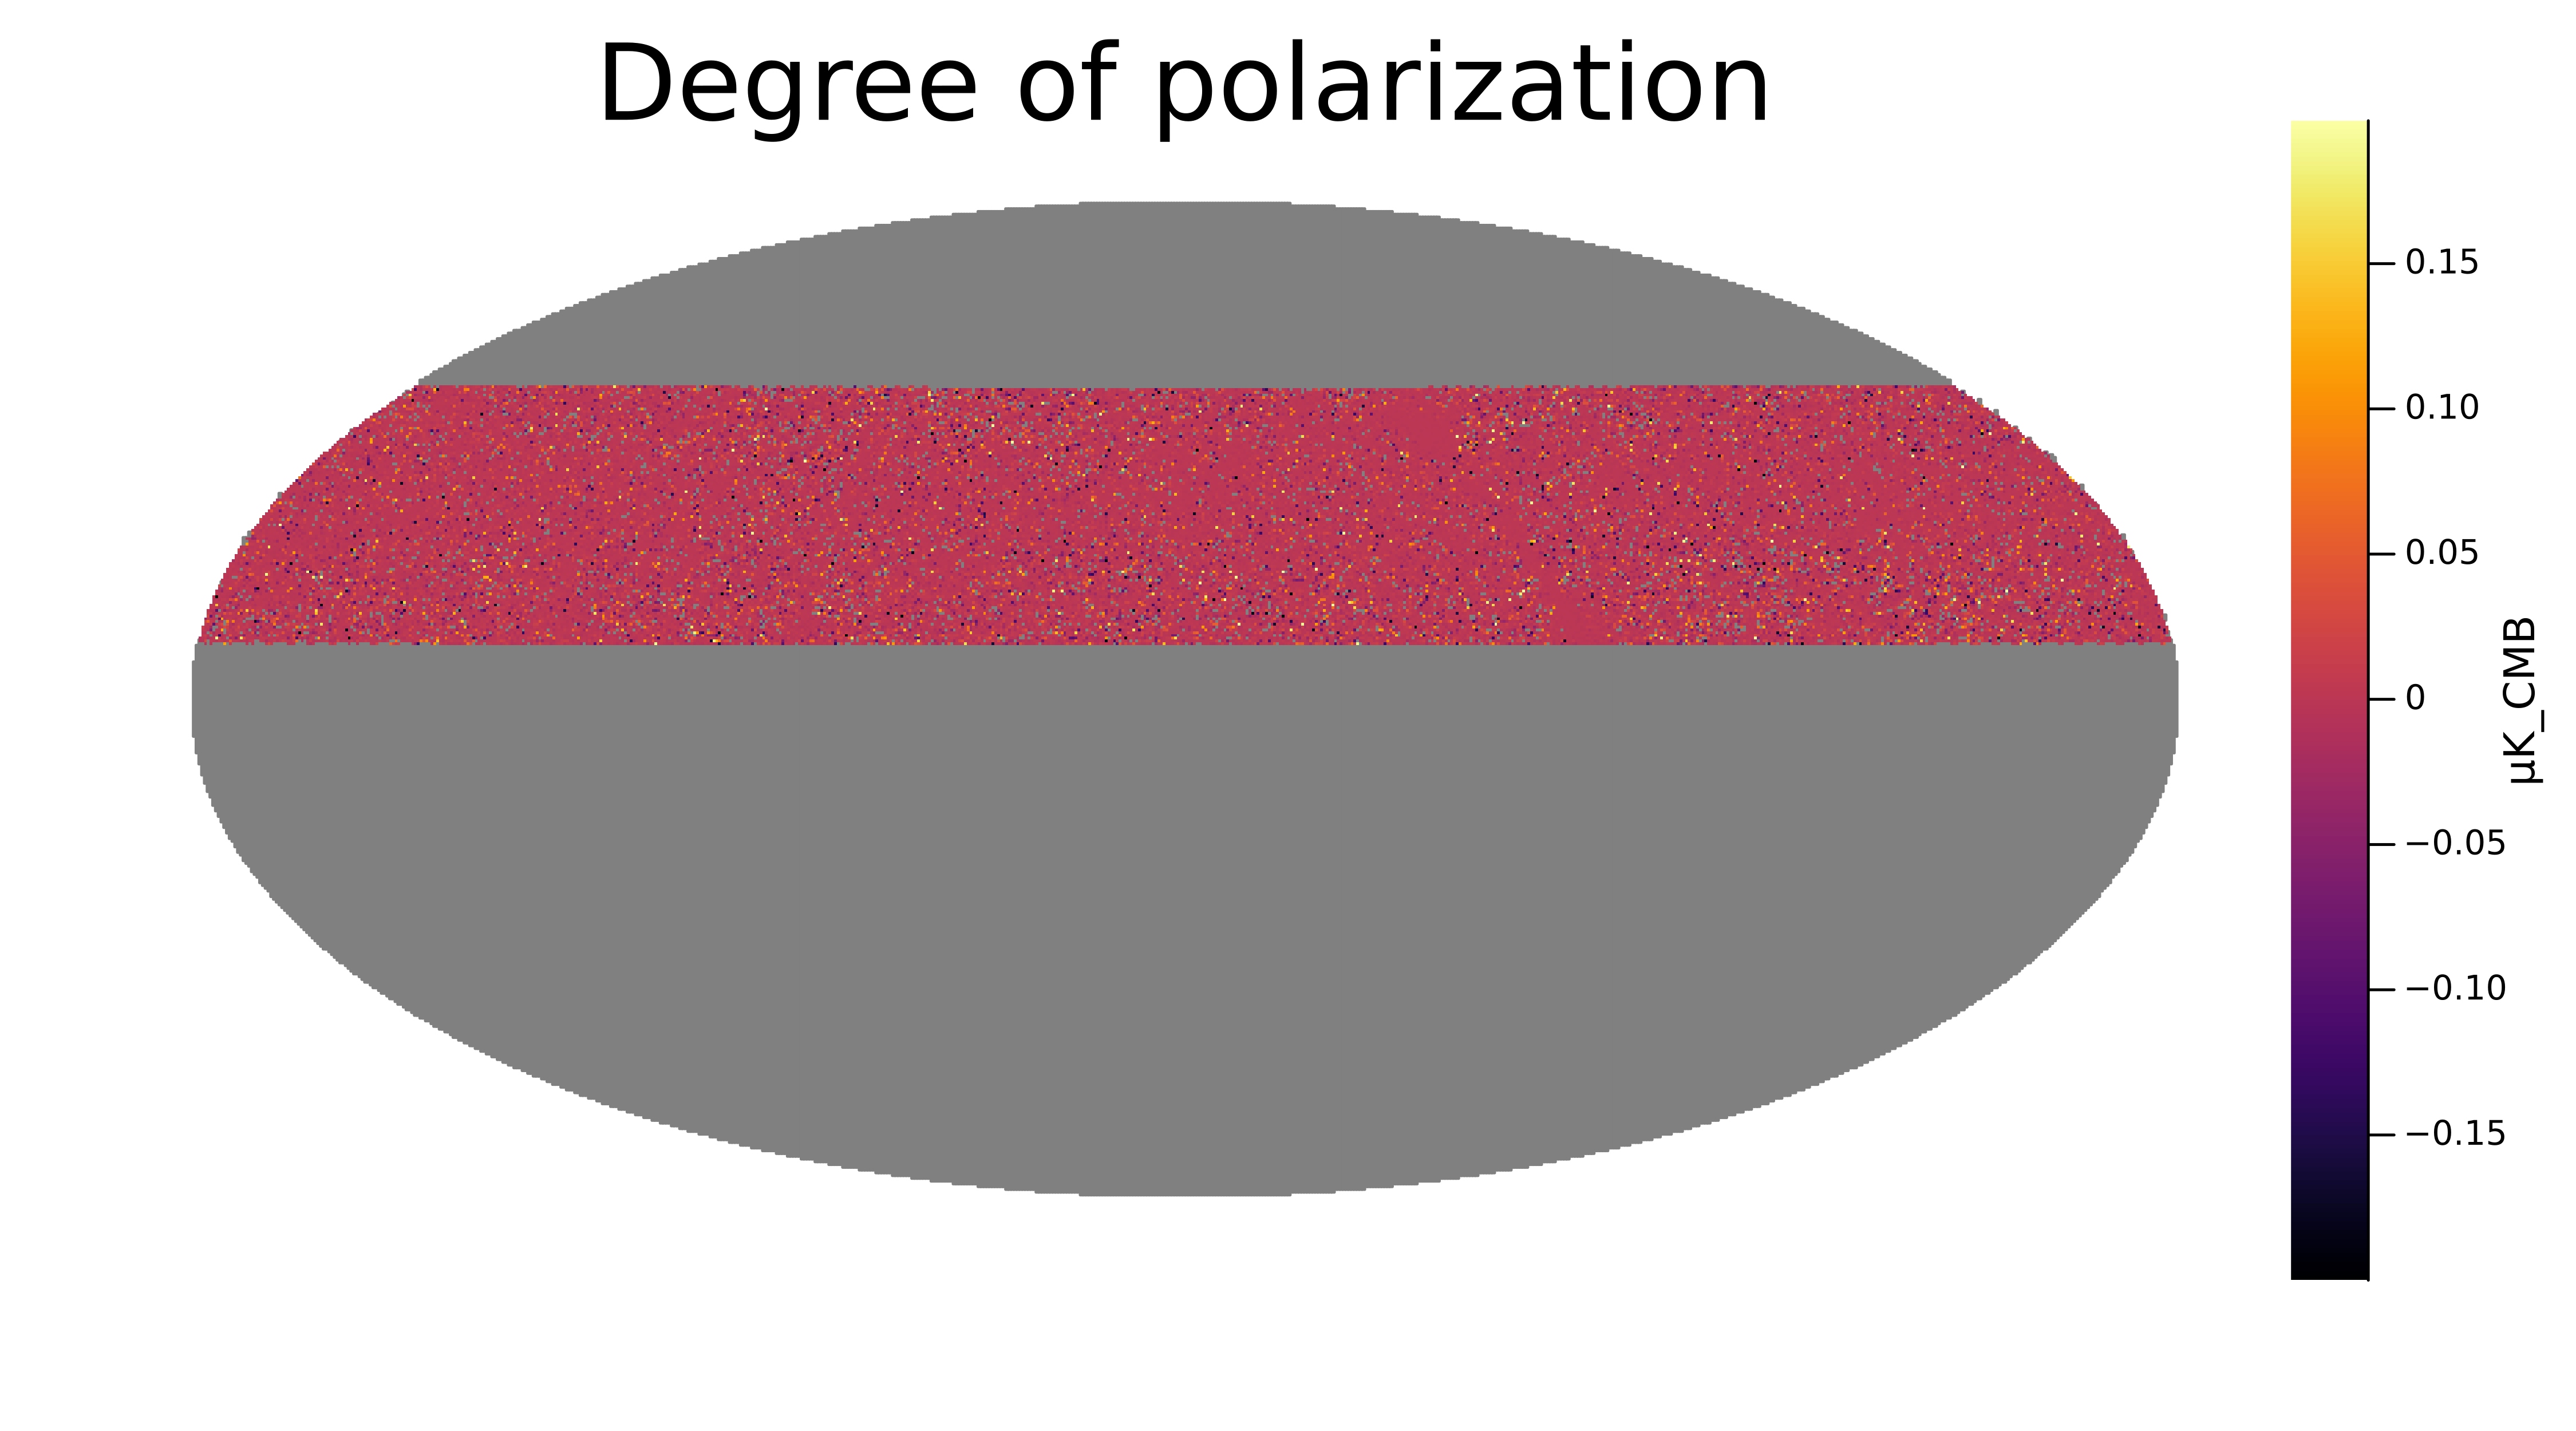

In [7]:
plot(result_pol, size = (900, 500), colorbar_title="μK_CMB", dpi=500, title = "Degree of polarization\n",  titlefontsize=25, topmargin=-10Plots.mm)

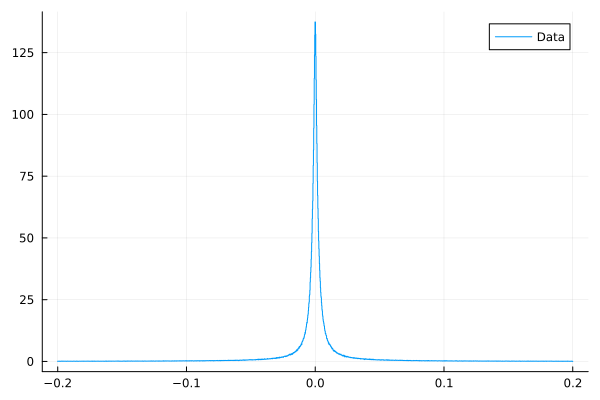

In [8]:
data = result_pol[isfinite.(result_pol)]
stephist(data, normalize = true, label="Data")